In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2

train,test = x[0:1000], x[1000:]

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [ ]:
train_step = 10
test_step = 20

trainX, trainY = convertToDataset(train, train_step)
testX, testY = convertToDataset(test, test_step)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(480, 20, 1)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1),  activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_input')>

In [ ]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.10564534366130829


In [ ]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

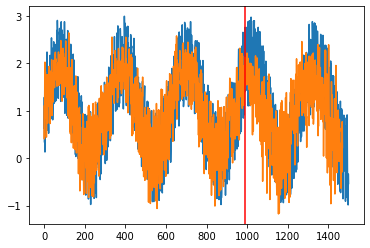

In [ ]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()